Итак, первая задача: нужно проверить, какой формат фотографий блюд является наилучшим, т.е. в какой из групп в среднем покупали больше всего. Всего пользователям показывались три варианта:

    A – прямоугольные 16:9
    B – квадратные
    C – прямоугольные 12:4

Каким статистическим тестом нужно воспользоваться для сравнения средних в данном случае?

ANOVA

Проверьте, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными) с помощью теста Левена.

In [1]:
import pandas as pd
import pingouin as pg
from scipy import stats
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
task_1 = pd.read_csv(r'5_task_1.csv')
task_2 = pd.read_csv(r'5_task_2.csv')

In [3]:
task_1

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


In [4]:
task_2

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


In [5]:
A = task_1.query('group == "A"').events
B = task_1.query('group == "B"').events
C = task_1.query('group == "C"').events

In [6]:
A

0       14
1       41
2       30
3       37
4       38
        ..
9995    25
9996    25
9997    30
9998    21
9999    21
Name: events, Length: 10000, dtype: int64

In [7]:
stats.levene(A,B,C)

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

Также убедитесь, что данные распределены нормально - тем же способом, что и в прошлом уроке.

Дополнительно: сравните  результат с qq-графиками. Какой вывод можно сделать по совокупности этих методов?

In [8]:
stats.shapiro(A)

/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9989418387413025, pvalue=4.318870651331963e-06)

In [9]:
stats.shapiro(B)

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


ShapiroResult(statistic=0.9990161061286926, pvalue=1.0504894817131571e-05)

In [10]:
stats.shapiro(C)

ShapiroResult(statistic=0.9989210963249207, pvalue=3.3885160064528463e-06)

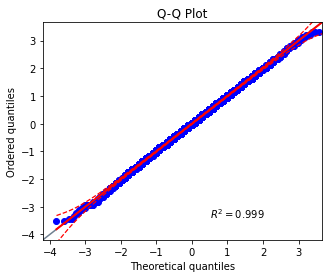

In [11]:
pg.qqplot(A)

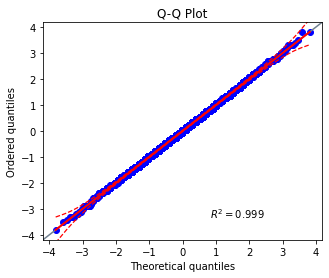

In [12]:
pg.qqplot(B)

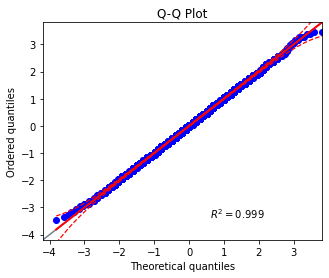

In [13]:
pg.qqplot(C)

Самое время провести тест! 

In [14]:
pg.anova(data = task_1, dv = 'events', between = 'group')

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377


Теперь используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 
Дополнительно: попробуйте другие варианты поправок на множественные сравнения через pingouin. Дают ли они те же выводы, что и Тьюки? 

In [15]:
stats.f_oneway(A,B,C)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [16]:
pg.pairwise_tukey(data = task_1, dv = 'events', between = 'group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.001,-0.806377
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.001,0.211712
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.001,1.018089


Во втором эксперименте требуется проверить, как пользователи отреагируют на изменение формата кнопки оформления заказа, с разбивкой по сегменту клиента.

Какой метод скорее всего пригодится в данном случае?

многофакторный дисперсионный анализ

Посмотрим на данные. Для начала визуализируйте распределение events для контрольной и тестовой групп. Соотнесите графики распределения и экспериментальные группы:

In [17]:
task_2

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


In [18]:
task_2_1 = task_2.query('group == "test"')
task_2_2 = task_2.query('group == "control"')

In [19]:
task_2_1

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
59995,92868,test,low,35.0
59996,63488,test,low,31.0
59997,3425,test,low,32.0
59998,53067,test,low,18.0


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


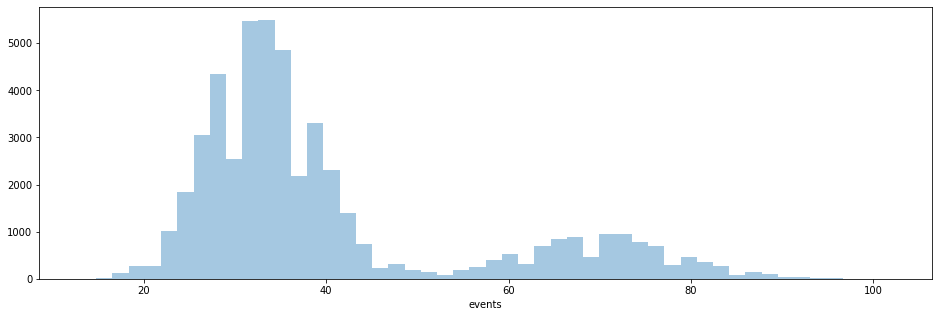

In [20]:
plt.figure(figsize=(16,5))
sns.distplot(task_2_1.events, bins = 50, kde = False)

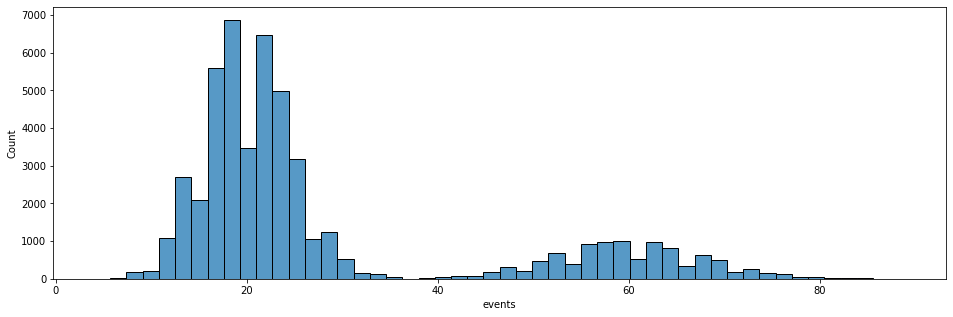

In [21]:
plt.figure(figsize=(16,5))
sns.histplot(task_2_2.events, bins = 50)

Посчитайте среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя. 

В качестве ответа укажите стандартное отклонение для пользователей из сегмента high и контрольной группы, с точностью до 2 знаков после точки.

In [22]:
task_2.groupby(['group', 'segment'], as_index = False).events.describe().round(2)

group          segment         count            mean          std  \
segment     high      low    high  low     high      low   high    low  high   
group                                                                          
control  control  control    high  low  10000.0  40000.0  59.97  20.03  7.81   
test        test     test    high  low  10000.0  40000.0  69.94  33.03  8.40   

                min         25%         50%         75%          max        
segment   low  high   low  high   low  high   low  high   low   high   low  
group                                                                       
control  4.47  31.0   4.0  55.0  17.0  60.0  20.0  65.0  23.0   89.0  41.0  
test     5.72  40.0  13.0  64.0  29.0  70.0  33.0  76.0  37.0  102.0  59.0

Проведите тест (через anova_lm либо pg.anova), а затем используйте критерий Тьюки, чтобы понять между какими группами есть статистически значимые различия.

В данном случае для последующих сравнений между группами можно проделать следующую операцию: соединить колонки group и segment в combination, чтобы потом передать в аргумент groups в MultiComparison либо pairwise_tukey:

+-------+---------+-------------+
| group | segment | combination |
+-------+---------+-------------+
| test  | high    | test / high |
| test  | high    | test / high |
+-------+---------+-------------+

Между какими группами были обнаружены статистически значимые различия? Выберите верные утверждения:

In [23]:
pg.anova(data = task_2, dv = 'events', between = ['group', 'segment'])

,Source,SS,DF,MS,F,p-unc,np2
0,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.528383
1,segment,2.362480e+07,1.0,2.362480e+07,689756.377484,0.000000e+00,0.873383
2,group * segment,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


In [24]:
task_2['comb'] = task_2['group'] + ' \ ' + task_2['segment']

In [25]:
task_2

,id,group,segment,events,comb
0,83440,test,high,78.0,test \ high
1,96723,test,high,71.0,test \ high
2,68719,test,high,80.0,test \ high
3,50399,test,high,80.0,test \ high
4,95613,test,high,78.0,test \ high
...,...,...,...,...,...
99995,60695,control,low,15.0,control \ low
99996,5934,control,low,16.0,control \ low
99997,30046,control,low,22.0,control \ low
99998,26474,control,low,21.0,control \ low


In [26]:
pg.pairwise_tukey(data = task_2, dv = 'events', between = 'comb')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,control \ high,control \ low,59.970800,20.031575,39.939225,0.065432,610.391461,0.001,6.824282
1,control \ high,test \ high,59.970800,69.938500,-9.967700,0.082766,-120.432523,0.001,-1.703109
2,control \ high,test \ low,59.970800,33.025925,26.944875,0.065432,411.798717,0.001,4.603981
3,control \ low,test \ high,20.031575,69.938500,-49.906925,0.065432,-762.727892,0.001,-8.527429
4,control \ low,test \ low,20.031575,33.025925,-12.994350,0.041383,-314.002699,0.001,-2.220314
5,test \ high,test \ low,69.938500,33.025925,36.912575,0.065432,564.135148,0.001,6.307128


Визуализируйте результаты теста и заполните пропуски:

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


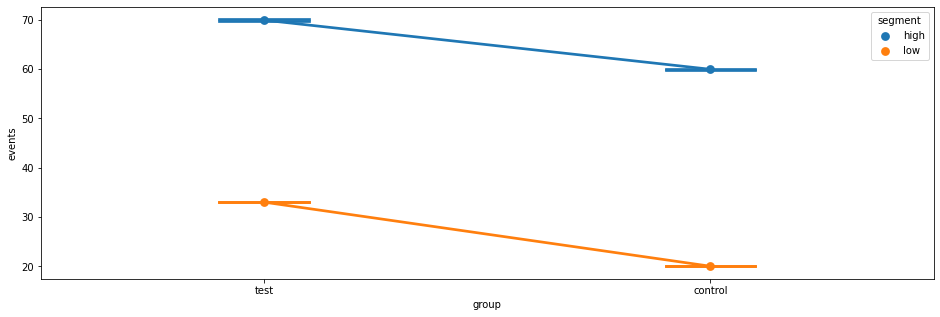

In [27]:
plt.figure(figsize=(16,5))
sns.pointplot(task_2.group, task_2.events, hue = task_2.segment, capsize = 0.2)